In [162]:
import numpy as np
import pandas as pd

# Read in data
bes_data = pd.read_csv("/Users/ahlstromvij/Dropbox/Academic/Work/Birkbeck/Research/Modelled Democracy/BES data/bes_data.csv")

In [163]:
# Have a look at first few observations
bes_data.head()

,Unnamed: 0,euVote,tooManyImmigrants,ability,partyIdentity,unionMember,income,livingSituation,gender,religion,age,ethnicGroup,education,workStatus,maritalStatus,region,wt_vote,euVote2
0,1,leave,0,-0.307871,Labour,No,3,2,2,0,1,White,0,4,3,East Midlands,1.110753,leave
1,2,remain,1,-0.307871,Labour,No,2,3,1,1,4,Asian,2,0,3,East Midlands,0.561521,remain
2,4,leave,1,-0.329742,Labour,No,9,1,2,1,6,White,0,1,1,East Midlands,0.919755,leave
3,5,remain,0,0.832879,Labour,No,10,1,2,1,6,White,7,1,1,East Midlands,0.651745,remain
4,9,remain,1,0.047353,Conservatives,No,4,1,1,1,6,White,0,4,1,East Midlands,1.724458,remain


In [164]:
# Recode factor variables
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

bes_data['euVote'] = number.fit_transform(bes_data['euVote'].astype('str'))
bes_data['partyIdentity'] = number.fit_transform(bes_data['partyIdentity'].astype('str'))
bes_data['unionMember'] = number.fit_transform(bes_data['unionMember'].astype('str'))
bes_data['ethnicGroup'] = number.fit_transform(bes_data['ethnicGroup'].astype('str'))
bes_data['region'] = number.fit_transform(bes_data['region'].astype('str'))

# Have a look at first few observations
bes_data.head()

,Unnamed: 0,euVote,tooManyImmigrants,ability,partyIdentity,unionMember,income,livingSituation,gender,religion,age,ethnicGroup,education,workStatus,maritalStatus,region,wt_vote,euVote2
0,1,0,0,-0.307871,2,0,3,2,2,0,1,4,0,4,3,0,1.110753,leave
1,2,2,1,-0.307871,2,0,2,3,1,1,4,0,2,0,3,0,0.561521,remain
2,4,0,1,-0.329742,2,0,9,1,2,1,6,4,0,1,1,0,0.919755,leave
3,5,2,0,0.832879,2,0,10,1,2,1,6,4,7,1,1,0,0.651745,remain
4,9,2,1,0.047353,0,0,4,1,1,1,6,4,0,4,1,0,1.724458,remain


In [165]:
# KEYS FOR FACTORS:

# euVote:
# 0 = leave
# 1 = did not vote
# 2 = remain

# partyIdentity:
# 0 = CONS
# 1 = GREEN
# 2 = LABOUR
# 3 = LIB DEM
# 4 = NO PARTY
# 5 = PLAID
# 6 = SNP
# 7 = UKIP

# UnionMember:
# 0 = no
# 1 = yes

# income:
# 1 = Under GBP 2,600
# 2 = GBP 2,600 - GBP 5,199
# 3 = GBP 5,200 - GBP 10,399
# 4 = GBP 10,400 - GBP 15,599
# 5 = GBP 15,600 - GBP 20,799
# 6 = GBP 20,800 - GBP 25,999
# 7 = GBP 26,000 - GBP 31,199
# 8 = GBP 31,200 - GBP 36,399
# 9 = GBP 36,400 - GBP 39,999
# 10 = GBP 40,000 - GBP 44,999
# 11 = GBP 45,000 - GBP 49,999
# 12 = GBP 50,000 - GBP 59,999
# 13 = GBP 60,000 - GBP 74,999
# 14 = GBP 75,000 - GBP 99,999
# 15 = GBP 100,000 or more

# livingSituation:
# 1 = Own home outright
# 2 = Own home on mortgage
# 3 = Rented from local authority
# 4 = Rented from private landlord
# 5 = It belongs to a Housing Association

# gender:
# 1 = male
# 2 = female

# religion:
# 0 = no
# 1 = yes

# age:
# 1 = 18-24
# 2 = 25-34
# 3 = 35-44
# 4 = 45-54
# 5 = 55-64
# 6 = 65-74
# 7 = 75-84
# 8 = 85+

# ethnicGroup:
# 0 = asian
# 1 = black
# 2 = mixed
# 3 = other
# 4 = white

# education:
# 0 = No qualification
# 1 = Clerical or professional qualification
# 2 = GCSE at D or below, or equivalent
# 3 = GCSE at C or above, or equivalent
# 4 = A-level or equivalent
# 5 = HNC/HND
# 6 = University/poly diploma
# 7 = First degree
# 8 = Postgraduate degree

# workStatus
# 0 = Unemployed/not working
# 1 = Retired
# 2 = Student
# 3 = Part-time
# 4 = Full-time

# maritalStatus:
# 1 = Married
# 2 = Living with partner
# 3 = Single
# 4 = Widowed
# 5 = Separated
# 6 = Divorced

# region:
# 0 = East Midlands
# 1 = Eastern
# 2 = London
# 3 = North East
# 4 = North West 
# 5 = Scotland
# 6 = South East
# 7 = South West
# 8 = Wales
# 9 = West Midlands
# 10 = Yorkshire & Humber

In [166]:
# Prepare X and y for regression
X = bes_data[['euVote','ability','unionMember','income','livingSituation','gender','religion','age','ethnicGroup','education','workStatus','maritalStatus','region']]
y = bes_data['partyIdentity']

In [167]:
X.head()

,euVote,ability,unionMember,income,livingSituation,gender,religion,age,ethnicGroup,education,workStatus,maritalStatus,region
0,0,-0.307871,0,3,2,2,0,1,4,0,4,3,0
1,2,-0.307871,0,2,3,1,1,4,0,2,0,3,0
2,0,-0.329742,0,9,1,2,1,6,4,0,1,1,0
3,2,0.832879,0,10,1,2,1,6,4,7,1,1,0
4,2,0.047353,0,4,1,1,1,6,4,0,4,1,0


In [168]:
y.head()

0    2
1    2
2    2
3    2
4    0
Name: partyIdentity, dtype: int64

In [169]:
# FIT MULTINOMIAL LOGISTIC REGRESSION (SOFTMAX) MODEL

from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, max_iter=10000, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
# Predict category on first observation
softmax_reg.predict([X.iloc[0,:]])

array([2])

In [179]:
# Predict probabilites on first observation
actual_prob = softmax_reg.predict_proba([X.iloc[0,:]])
actual_prob

array([[1.37128118e-01, 2.71316803e-02, 4.52122326e-01, 2.04755876e-02,
        2.78706894e-01, 1.17495035e-04, 4.30440361e-02, 4.12738634e-02]])

In [172]:
# SIMULATE FULLY INFORMED (REPORTED) PREFERENCES

# Find maximum ability value
maxValue = X['ability'].max()
maxValue

0.8328792750513141

In [173]:
# Take first observation from data as example
obs = X.iloc[0,:]
# Assign max ability value to that observation
obs[1] = maxValue
obs

/Users/ahlstromvij/Dropbox/Personal/Coding/Python/handson-ml/env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


euVote             0.000000
ability            0.832879
unionMember        0.000000
income             3.000000
livingSituation    2.000000
gender             2.000000
religion           0.000000
age                1.000000
ethnicGroup        4.000000
education          0.000000
workStatus         4.000000
maritalStatus      3.000000
region             0.000000
Name: 0, dtype: float64

In [178]:
# Predict informed vote
softmax_reg.predict([obs])

array([2])

In [ ]:
# Predict full probability distribution over all parties (and abstain)
full_inf_prob = softmax_reg.predict_proba([obs])
full_inf_prob

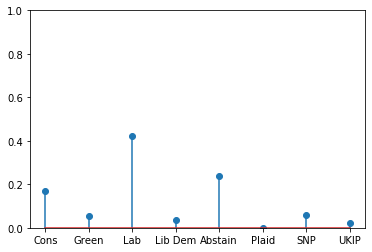

In [176]:
# Plot the distribution
import matplotlib.pyplot as plt

x=["Cons","Green","Lab","Lib Dem","Abstain","Plaid","SNP","UKIP"]
values=full_inf_prob.tolist()[0]
 
# stem function: first way
plt.stem(x, values, use_line_collection=True)
plt.ylim(0, 1)
plt.show()

In [190]:
# Calculate difference between actual and fully informed vote
prob_diff = np.subtract(full_inf_prob, actual_prob)

In [191]:
prob_diff

array([[ 3.39725584e-02,  2.60317126e-02, -3.14103704e-02,
         1.54568366e-02, -4.06689256e-02,  7.30751105e-05,
         1.56044244e-02, -1.90593111e-02]])

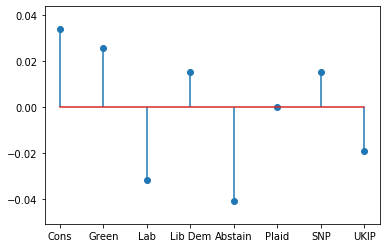

In [192]:
# Plot that difference
x=["Cons","Green","Lab","Lib Dem","Abstain","Plaid","SNP","UKIP"]
values=prob_diff.tolist()[0]
 
# stem function: first way
plt.stem(x, values, use_line_collection=True)
plt.ylim(min(prob_diff.tolist()[0]) - 0.01, max(prob_diff.tolist()[0]) + 0.01)
plt.show()